In [1]:
from hierarchical_chunker_utilities_GPT4 import *

In [ ]:
openAI_API_key = 'your_openAI_API_key'

In [3]:
story1 = '''Yeah I was in the boy scouts at the time. And we was doing the 50-yard dash racing but we was at the pier marked off and so we was doing the 50-yard dash. There was about 8 or 9 of us you know, going down, coming back. And going down the third time I caught cramps and I started yelling "Help!" but the fellows didn't believe me you know. They thought I was just trying to catch up because I was going on or slowing down. So all of them kept going.They leave me. And so I started going down. Scoutmaster was up there. He was watching me. But he didn't pay me no attention either. And for no reason at all there was another guy who had just walked up that minute... He just jumped over and grabbed me.'''

Hierarchical chunking: 100%|████████████████| 169/169 [00:14<00:00, 11.99leaf/s]



Fallback used on 59/140 spans (42.1%); average span length when fallback triggered: 2.15 tokens
Fallback lengths: [3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


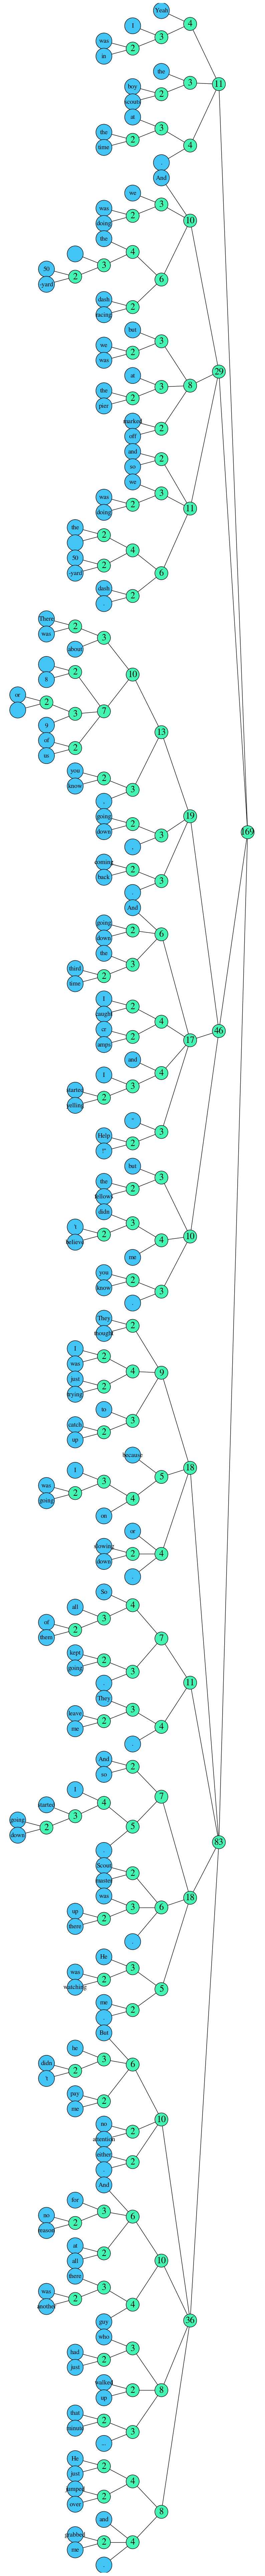

In [ ]:
result1 = main(story1, model = 'gpt-4o', api_key = openAI_API_key, multithread=True, figsize=(10, 100), debug=False, showfig=True)

### Try other Labov stories

In [5]:
import os
import glob
import numpy as np
import pandas as pd
import json

dr = os.getcwd()

# build the target directory path
dir_path_labov = os.path.join(dr, "data", "compiled_data_combined_30")

# list all .json files, strip off the .json, and put into a numpy array
story_names = np.array(
    [os.path.splitext(fname)[0]
     for fname in os.listdir(dir_path_labov)
     if fname.endswith(".json")],
    dtype="<U32"   # adjust the Unicode length if you have longer names
)

print(story_names)
print(f"Number of stories: {len(story_names)}")

['Adamo' 'bear' 'Boyscout' 'CI' 'Costa' 'DAlmaggio' 'Dalphonso'
 'doSomething' 'Furlow' 'Guyton' 'Hawkins' 'Hester' 'hester_v1-park'
 'Knott' 'Laidlaw' 'McCaffrey' 'Norman' 'Schissel' 'schissel_v1-pool'
 'Shambaugh' 'Stein' 'Tarentino' 'Triplett' 'triplett_v1-rookie'
 'Williams' 'youngest']
Number of stories: 26


In [6]:
def get_story(story_name):
    path = os.path.join(dir_path_labov, story_name + ".json")
    with open(path, "r", encoding="utf-8") as f:
        json_story = json.load(f)
    return json_story['narrative']

# Example usage
story_name = 'Schissel' # Get the first story name
test_story = get_story(story_name)
test_story

'My brother put a knife in my head. This was just a few days after my father had died. and we were sitting shiva. And the reason the fight started He saw a rat out in the yard or – this was out in Coney Island – and he started talk about it. And my mother had just sat down to have a cup of coffee and I told him to cut it out. \'Course kids y\'know, he don\'t hafta listen to me. So that\'s when I grabbed his arm and twisted it up behind him. When I let go his arm there was a knife on the table, he just picked it up and he let me have it. And ... I started bleeding – like a pig. And naturally first thing to do run to the doctor, and the doctor just says "Just about this much more," he says, "and you\'d a been dead."'

Hierarchical chunking: 100%|████████████████| 183/183 [00:12<00:00, 14.49leaf/s]



Fallback used on 55/155 spans (35.5%); average span length when fallback triggered: 2.36 tokens
Fallback lengths: [2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 7, 2, 3, 2, 3, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


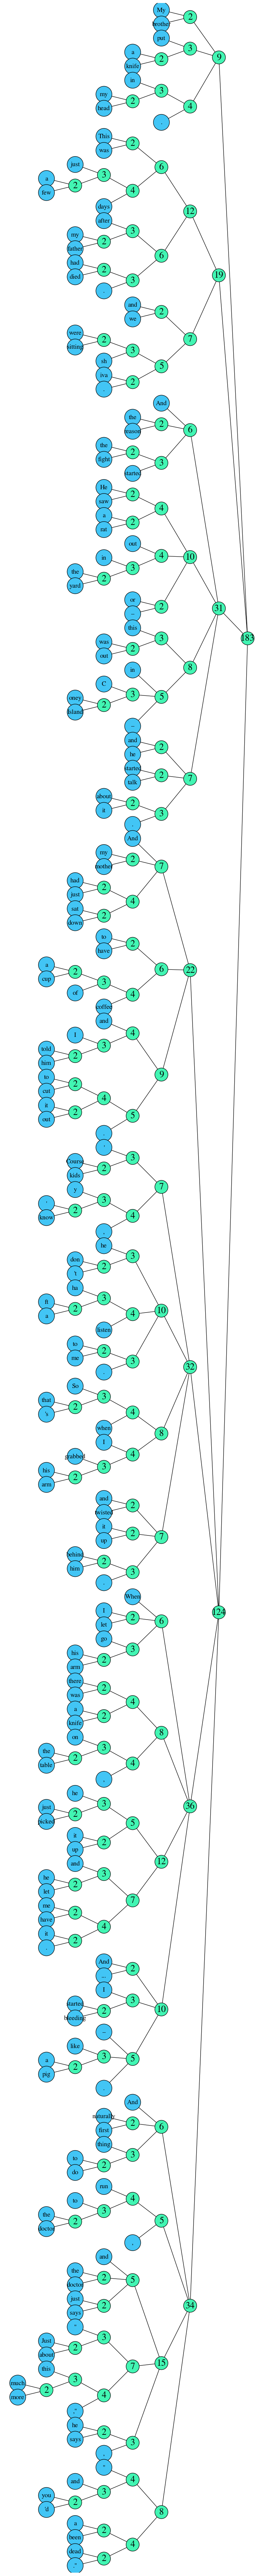

In [ ]:
result_test = main(test_story, model = 'gpt-4o', api_key = openAI_API_key, k=4, multithread=True, figsize=(10, 100), debug=False, showfig=True)

## Perform chunking

In [8]:
import numpy as np

# if the average fallback length is greater than say 3, means the LLM has failed to segment some pieces, redo those
redo_stories = []
redo_stories = np.array(redo_stories, dtype='<U32')
print("Redo stories:", redo_stories)

Redo stories: []


#### Note: to redo all the stories, change the redo_stories to story_names

In [ ]:
import os
import json
import numpy as np
from hierarchical_chunker_utilities_GPT4_18Jun2025 import *

# 1. Locate your data directories
dr = os.getcwd()
labov_dir = os.path.join(dr, "data", "compiled_data_combined_30")
output_dir = os.path.join(dr, "data", "labov_trees","k=4")
os.makedirs(output_dir, exist_ok=True)

# 2. Gather all story names
story_names = np.array([
    os.path.splitext(fname)[0]
    for fname in os.listdir(labov_dir)
    if fname.endswith(".json")
], dtype="<U32")

def get_story(name: str) -> str:
    path = os.path.join(labov_dir, name + ".json")
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)["narrative"]

# Initialize a list to store the roots of the trees
tree_roots = []
tree_Ns = []

# 3. Process each story
# for name in story_names:
for name in redo_stories:
    print(f"--- Processing {name} ---")
    narrative = get_story(name)
    
    # (a) run the chunker; suppress inline figures
    result = main(
        narrative,
        model="gpt-4o",
        api_key=openAI_API_key,
        k=4,
        multithread=True,
        debug=False,
        showfig=False,     
    )

    # Store the number of nodes in the tree
    tree_Ns.append(len(result["tokens"]))
    
    # (b) save the raw result dict
    out_json = os.path.join(output_dir, f"{name}_result.json")
    with open(out_json, "w", encoding="utf-8") as outf:
        json.dump(result, outf, ensure_ascii=False, indent=2)
    
    # 3) dynamic figsize based on token count
    num_tokens = len(result["tokens"])
    raw_height = num_tokens / 1.5
    height = min(raw_height, 500)  
    figsize = (10, height)

    # 4) re-plot & save
    fig_path = os.path.join(output_dir, f"{name}.png")
    root = plot_chunks_with_text_vertical(
        result["partition"],
        result["original_text"],
        figsize   = figsize,
        show_text = True,
        showfig   = False,  # suppress inline figure display
        out_file  = fig_path
    )

    tree_roots.append(root)
    
    print(f"→ saved JSON to {out_json}")
    print(f"→ saved tree plot to {fig_path}\n")

--- Processing youngest ---


Hierarchical chunking: 100%|██████████████| 2331/2331 [02:05<00:00, 18.65leaf/s]



Fallback used on 705/1989 spans (35.4%); average span length when fallback triggered: 2.17 tokens
Fallback lengths: [3, 3, 2, 5, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 4, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 